# Exploration of CheckThat 2021 Task 1a English dataset

## Import of Python modules and loading of data

In [21]:
%load_ext autoreload
%autoreload

from checkthat_utils import load_check_that_dataset, CheckThatLabel
from plotting_utils import dataframe_to_text, show_word_cloud, show_bar_plot, show_histogram_plot, show_sub_plots_with_legends, show_sub_plots_pie_chart
import os
import numpy as np

folder_path = os.path.join("../data", "CheckThat")
binary_verdicts = [CheckThatLabel.CHECK_WORTHY, CheckThatLabel.NON_CHECK_WORTHY]
binary_data = load_check_that_dataset(folder_path)
binary_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,topic_id,tweet_url,tweet_text,claim,check_worthiness
tweet_id,,,,,
1234964653014384644,covid-19,https://twitter.com/EricTrump/status/123496465...,Since this will never get reported by the medi...,1,1
1234869939720216578,covid-19,https://twitter.com/RealJamesWoods/status/1234...,"Thanks, #MichaelBloomberg. Here’s a handy litt...",0,0
1234873136304267267,covid-19,https://twitter.com/hayxsmith/status/123487313...,"Folks, when you say ""The corona virus isn't a ...",0,0
1235071285027147776,covid-19,https://twitter.com/ipspankajnain/status/12350...,Just 1 case of Corona Virus in India and peop...,1,0
1234911110861594624,covid-19,https://twitter.com/PressSec/status/1234911110...,President @realDonaldTrump made a commitment...,1,1


## Word clouds

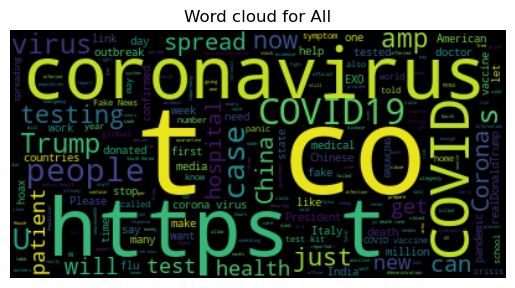

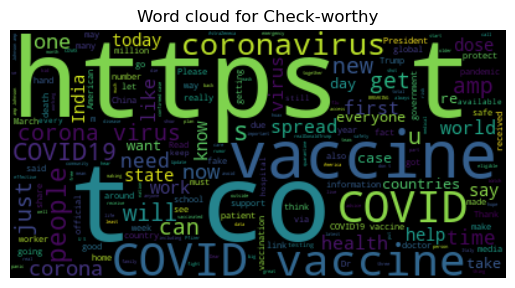

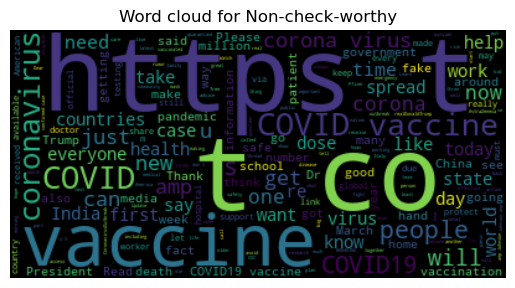

In [22]:
%autoreload

categories = ["All", "Check-worthy", "Non-check-worthy"]
titles = [f"Word cloud for {category}" for category in categories]
base_dir = os.path.join("..", "figures", "checkthat", "wordclouds")
file_paths = [os.path.join(base_dir, f"{category}.png") for category in categories] 
verdicts = [None, CheckThatLabel.CHECK_WORTHY, CheckThatLabel.NON_CHECK_WORTHY]

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

for verdict, title, file_path in zip(verdicts, titles, file_paths):
    if verdict is None:
        text = dataframe_to_text(binary_data, labels=["tweet_text"])
    else:
        filtered_data = binary_data[binary_data["check_worthiness"] == verdict.value]
        text = dataframe_to_text(filtered_data, labels=["tweet_text"])
    show_word_cloud(text, title, file_path)

## Total distribution

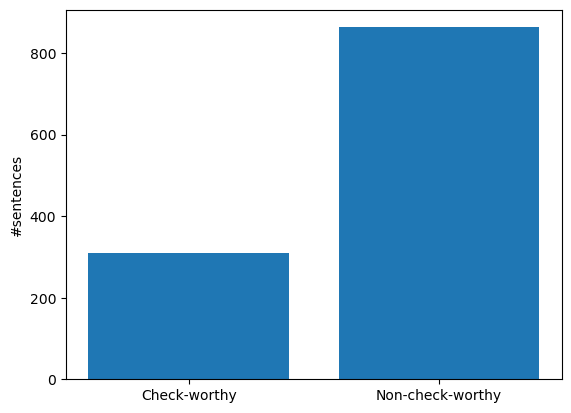

In [23]:
x = ["Check-worthy", "Non-check-worthy"]
y = [binary_data[binary_data["check_worthiness"] == verdict.value].shape[0] for verdict in binary_verdicts]
file_path = os.path.join("..", "figures", "checkthat", "verdict_distribution", "total_distribution.png")

if not os.path.exists(os.path.dirname(file_path)):
    os.makedirs(os.path.dirname(file_path))

show_bar_plot(x=x, y=y, ylabel="#sentences", file_path=file_path)

## Average number of words per Tweet

'Tweet word count for verdict CHECK_WORTHY'

count    309.000000
mean      37.032362
std       10.466036
min       11.000000
25%       30.000000
50%       40.000000
75%       44.000000
max       53.000000
Name: tweet_text, dtype: float64

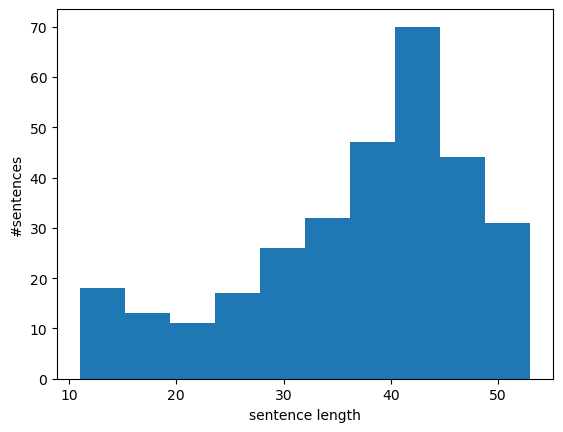

'Tweet word count for verdict NON_CHECK_WORTHY'

count    863.000000
mean      31.252607
std       13.455302
min        3.000000
25%       20.000000
50%       34.000000
75%       42.500000
max       56.000000
Name: tweet_text, dtype: float64

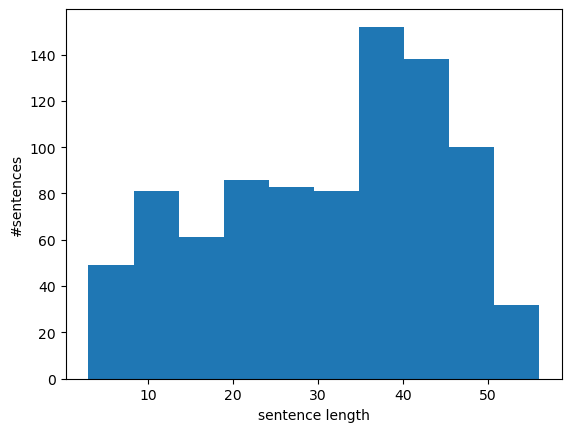

In [24]:
for verdict in binary_verdicts:
    filtered_data = binary_data[binary_data["check_worthiness"] == verdict.value]
    tweet_lengths = filtered_data["tweet_text"].str.split().str.len()
    # file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", f"{verdict}.png")
    display(f"Tweet word count for verdict {verdict.name}")
    display(tweet_lengths.describe())
    show_histogram_plot(x=tweet_lengths, xlabel="sentence length", ylabel="#sentences")

## Average word length

'Average word length for verdict CHECK_WORTHY'

count    309.000000
mean       5.620698
std        0.864043
min        4.035714
25%        5.081081
50%        5.488372
75%        6.037037
max        9.653846
Name: tweet_text, dtype: float64

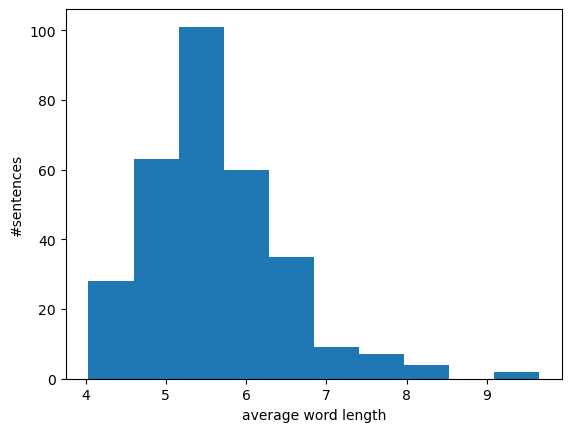

'Average word length for verdict NON_CHECK_WORTHY'

count    863.000000
mean       5.753954
std        1.252365
min        3.333333
25%        4.920244
50%        5.558824
75%        6.293385
max       13.700000
Name: tweet_text, dtype: float64

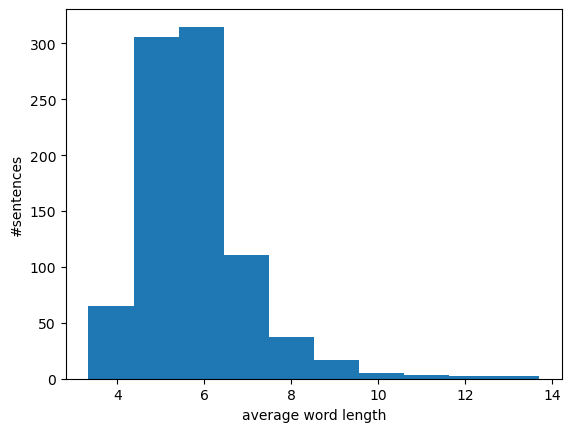

In [25]:
for verdict in binary_verdicts:
    filtered_data = binary_data[binary_data["check_worthiness"] == verdict.value]
    avg_word_lengths = filtered_data["tweet_text"].str.split().agg(lambda x: np.mean([len(word) for word in x]))
    display(f"Average word length for verdict {verdict.name}")
    display(avg_word_lengths.describe())
    show_histogram_plot(x=avg_word_lengths, xlabel="average word length", ylabel="#sentences")